In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [27]:
# Import the log file

#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190624_200747/190624_200747_MD_ParamSearch_All.csv")
#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_201853/190622_201853_MD_ParamSearch_All.csv")
df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_202211/190622_202211_MD_ParamSearch_All.csv")
#df = pd.read_csv("/home/alex/Desktop/Helico/0_Database/RPi_import/190622_234007/190622_234007_MD_ParamSearch_All.csv")
# Add the f1_score

# Display
df.tail()

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold_low,threshold_gain,sigma,diffMethod,dilationIterations,skipFrame,real_fps,avg_nb_boxes,avg_nb_filtered_boxes,avg_nb_heli_bbox,precision,recall,f1_score
295,7,25,9,3,5,65,1.25,0.1,0,7,0,155.453091,1.236620,1.222535,0.873239,0.714286,0.551601,0.622490
296,7,25,9,3,5,65,1.25,0.3,0,7,0,152.769741,1.212676,1.201408,0.864789,0.719812,0.546263,0.621143
297,7,25,9,3,5,65,1.25,0.5,0,7,0,155.536781,1.128169,1.121127,0.863380,0.770101,0.545374,0.638542
298,7,25,9,3,5,65,1.25,0.7,0,7,0,153.520477,1.074648,1.073239,0.857746,0.799213,0.541815,0.645811
299,7,25,9,3,5,65,1.25,0.9,0,7,0,147.792958,1.049296,1.049296,0.850704,0.810738,0.537367,0.646335


[0, 1, 0, 1]

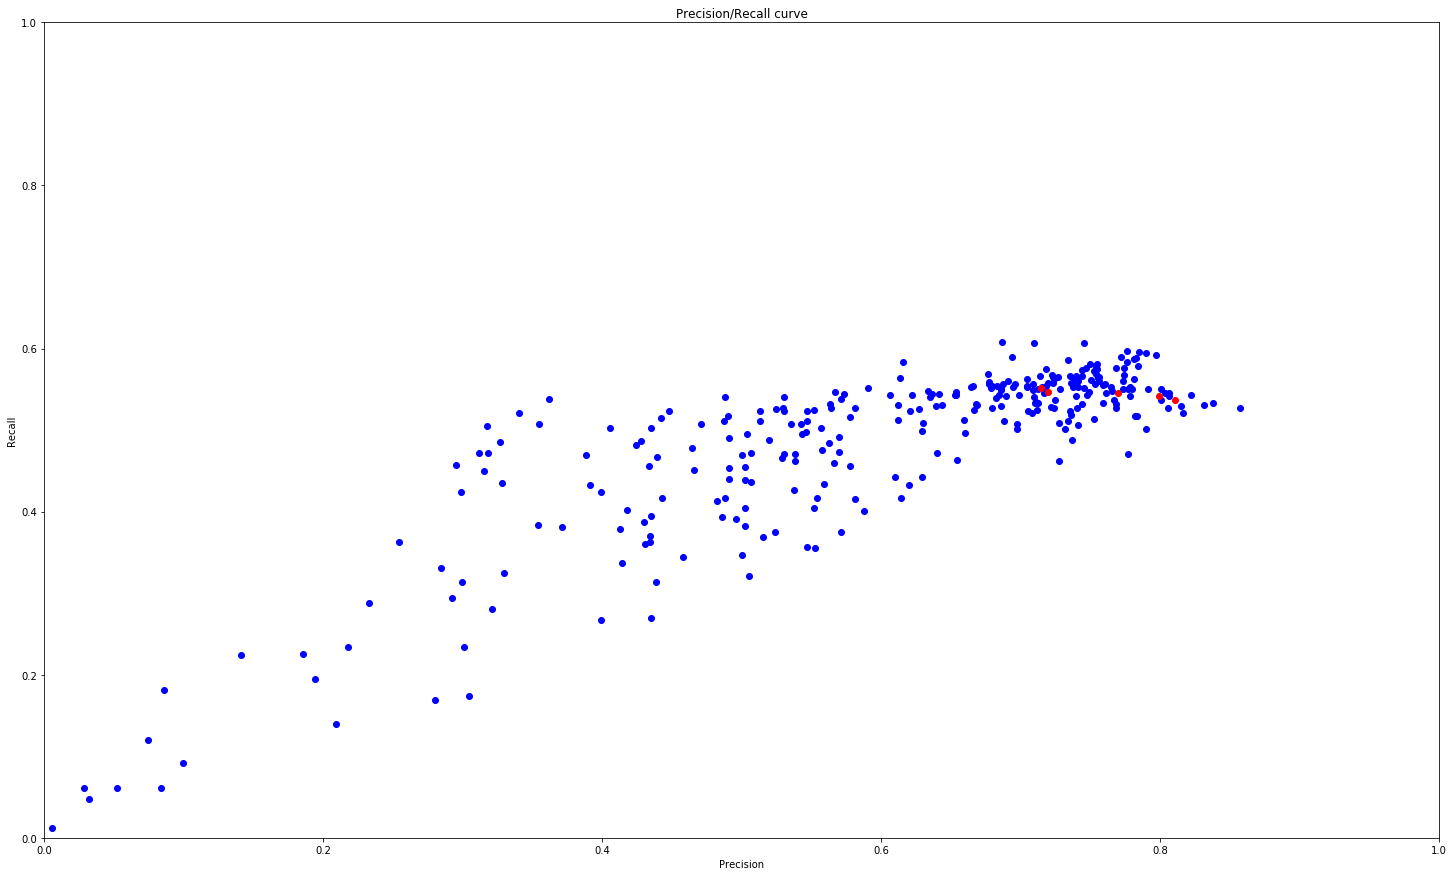

In [28]:
nSim = len(df)-5 # Show where the last 10 values have been found
plt.figure(figsize=(25, 15))
plt.scatter(df["precision"][:nSim], df["recall"][:nSim], c='blue')
plt.scatter(df["precision"][nSim:], df["recall"][nSim:], c='red')
plt.title("Precision/Recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.axis([0, 1, 0, 1])

In [35]:
def plotParam(param, paramRange):
    plt.figure(figsize=(25, 15))
    cmap = matplotlib.cm.get_cmap("jet")
    for index, value in enumerate(paramRange):
        #plt.figure(figsize=(25, 15))
        indexes = (df[param] == value)
        prec = df["precision"][indexes]
        recall = df["recall"][indexes]
        #print(min(paramRange), max(paramRange))
        
        if len(paramRange)>1:
            cmapValue = index/(len(paramRange)-1)
        else:
            cmapValue=0
        #print(cmapValue)
        plt.scatter(prec, recall, c=cmap(cmapValue))
        
        xcText, ycText = np.mean(prec), np.mean(recall)
        plt.text(xcText, ycText, str(round(value, ndigits=2)), color=cmap(cmapValue), fontdict={"weight": "bold", "size": 30})
        plt.title(param+" impact", fontdict={"weight": "bold", "size": 30})
        plt.xlabel("Precision", fontdict={"weight": "bold", "size": 20})
        plt.ylabel("Recall", fontdict={"weight": "bold", "size": 20})
        plt.axis([0, 1, 0, 1])

param = ["residualConnections"]
paramRange = [range(1, 11)]
for i in range(len(param)):
    plotParam(param[i], paramRange[i])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

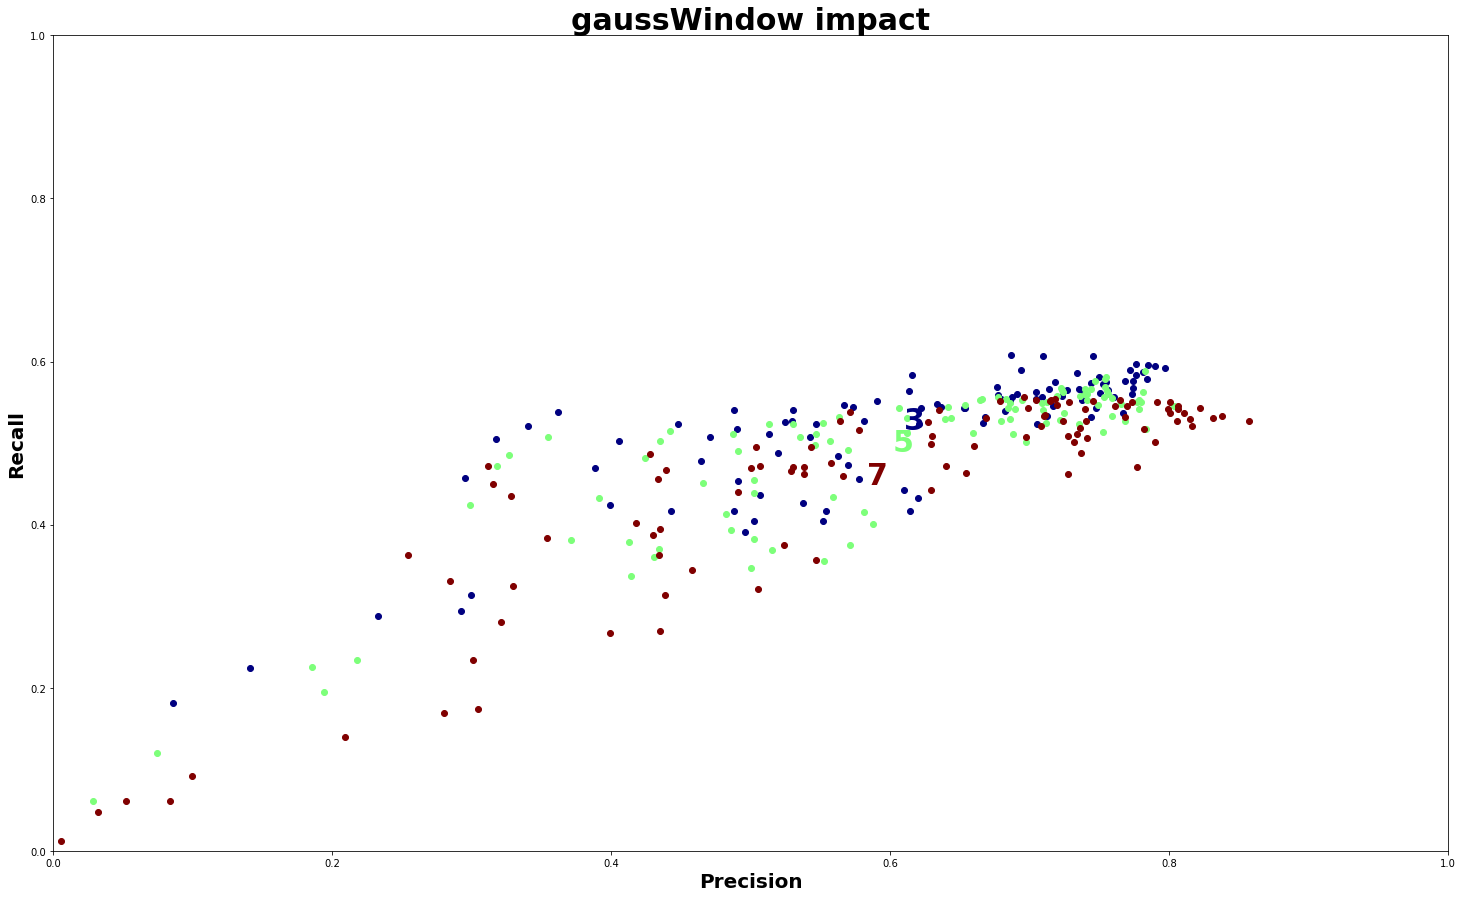

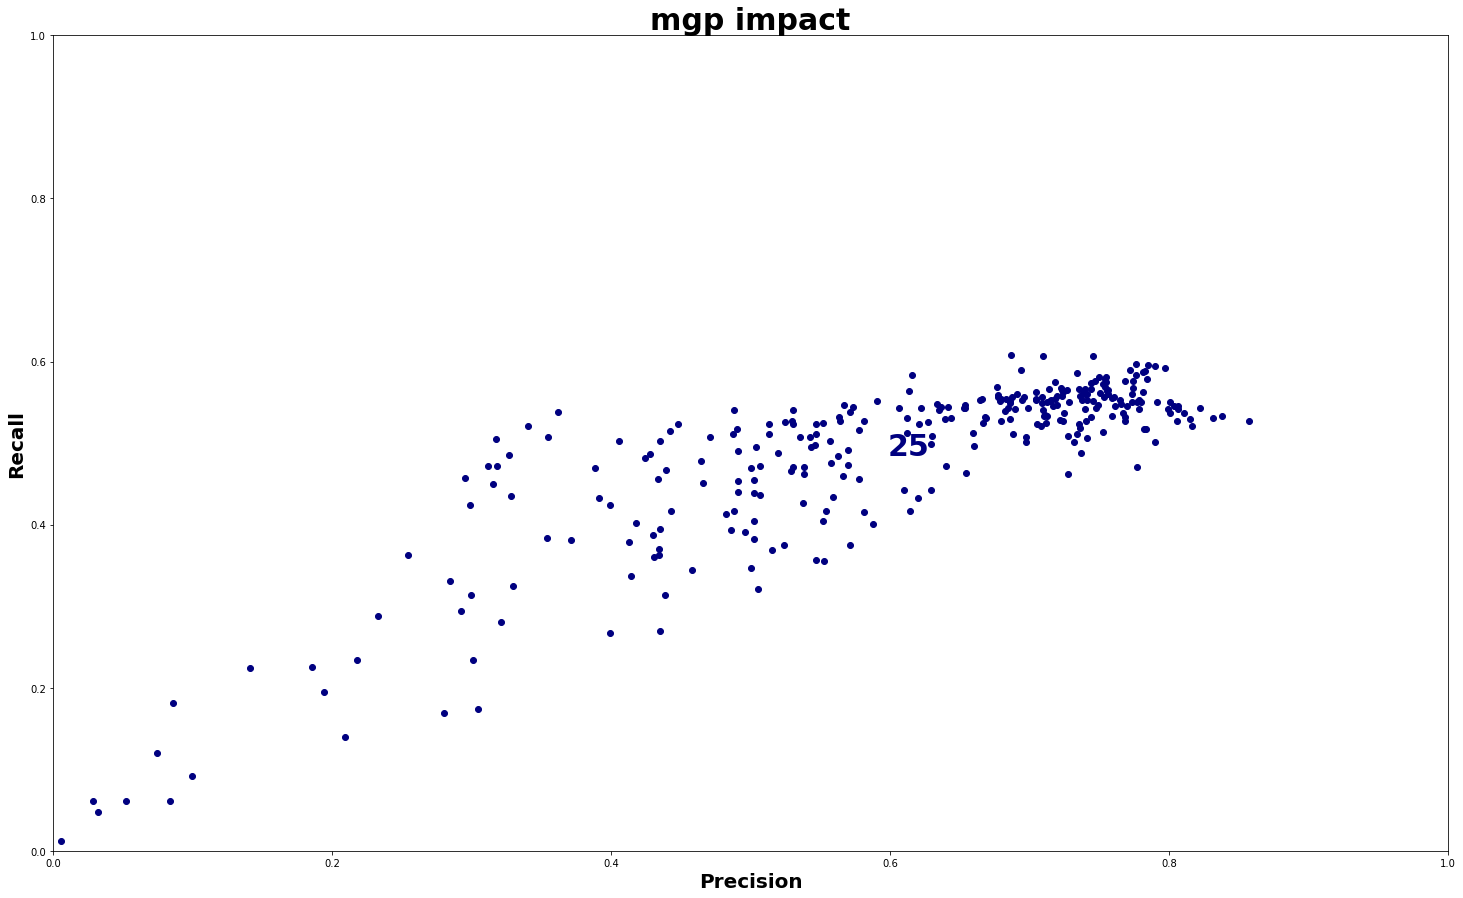

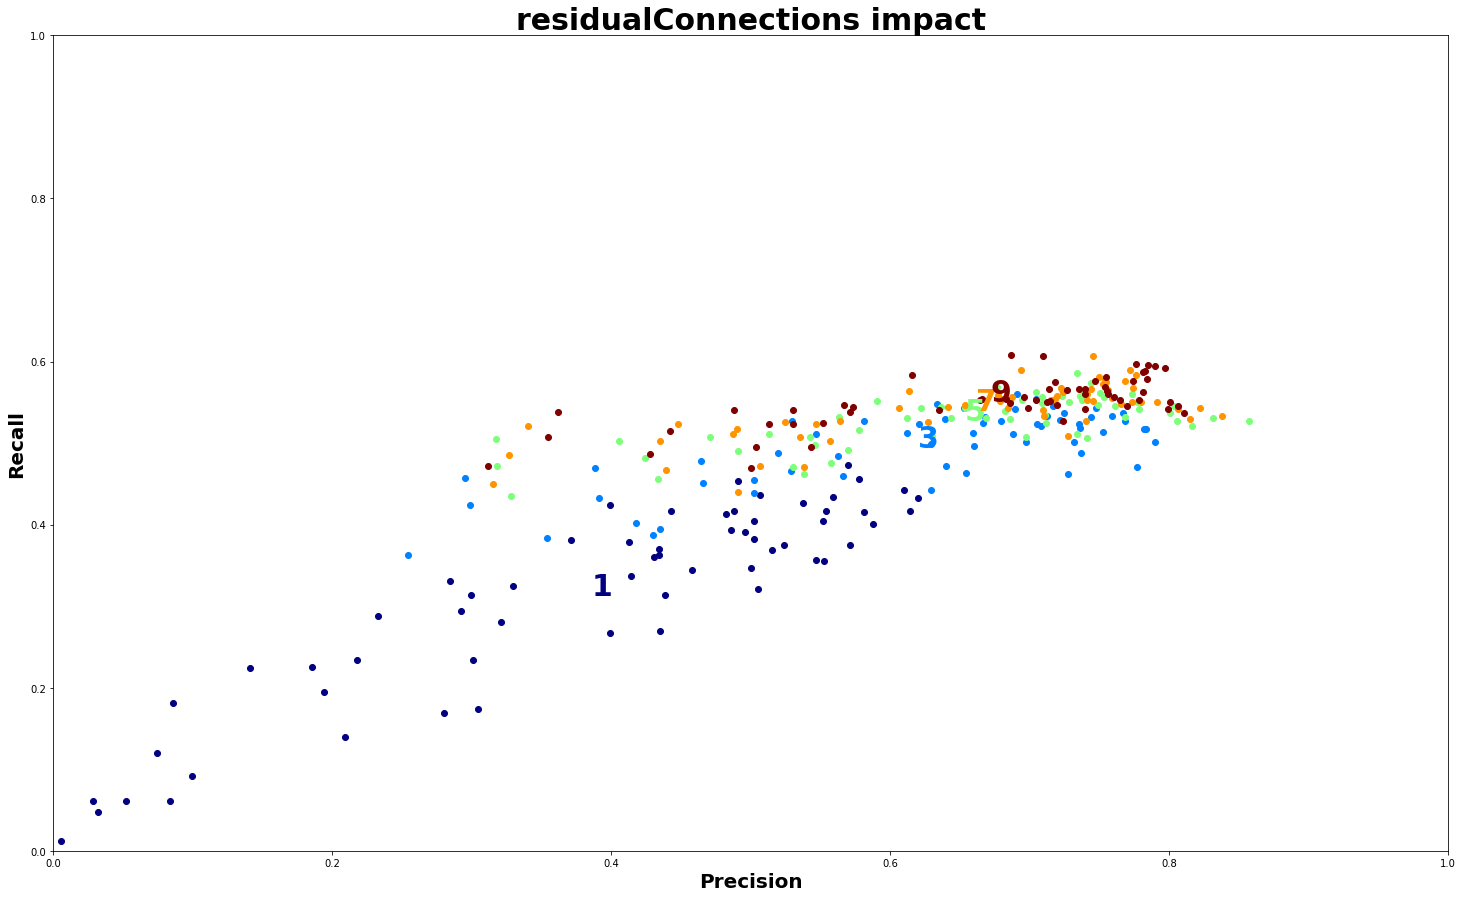

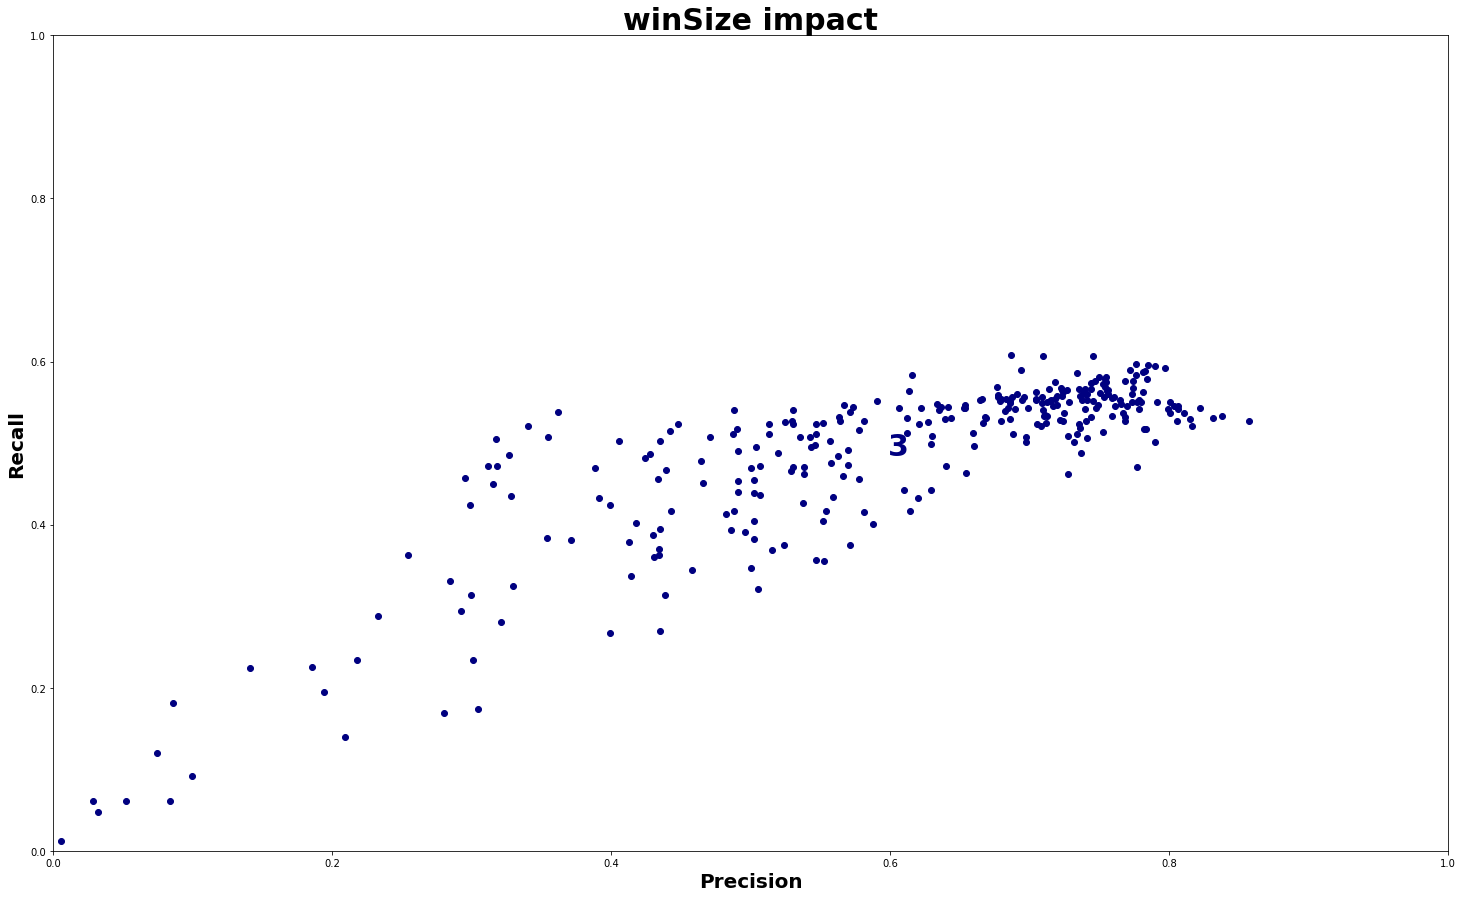

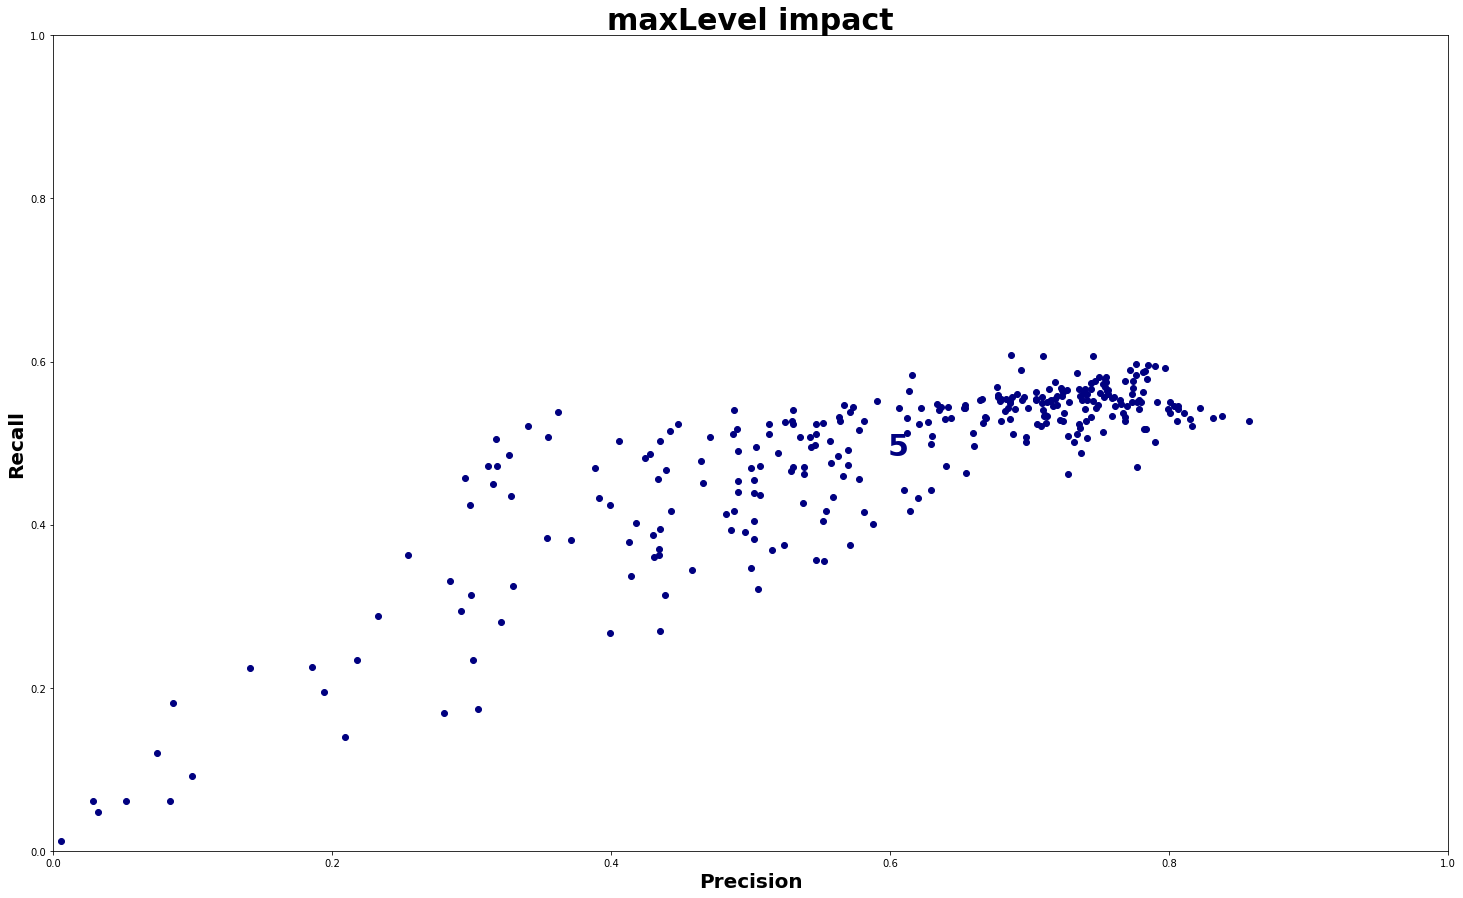

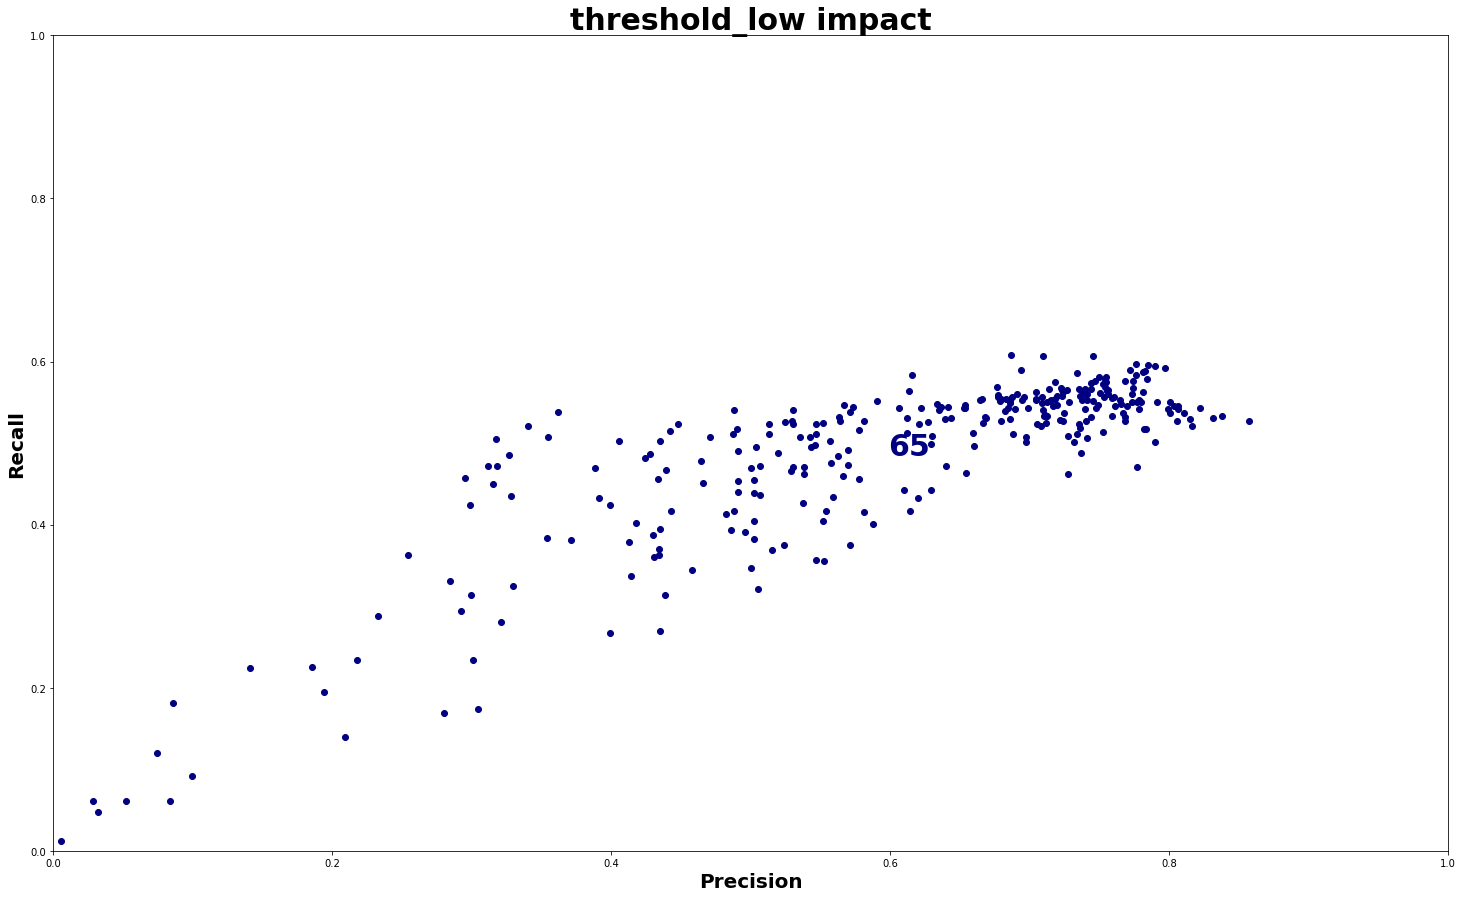

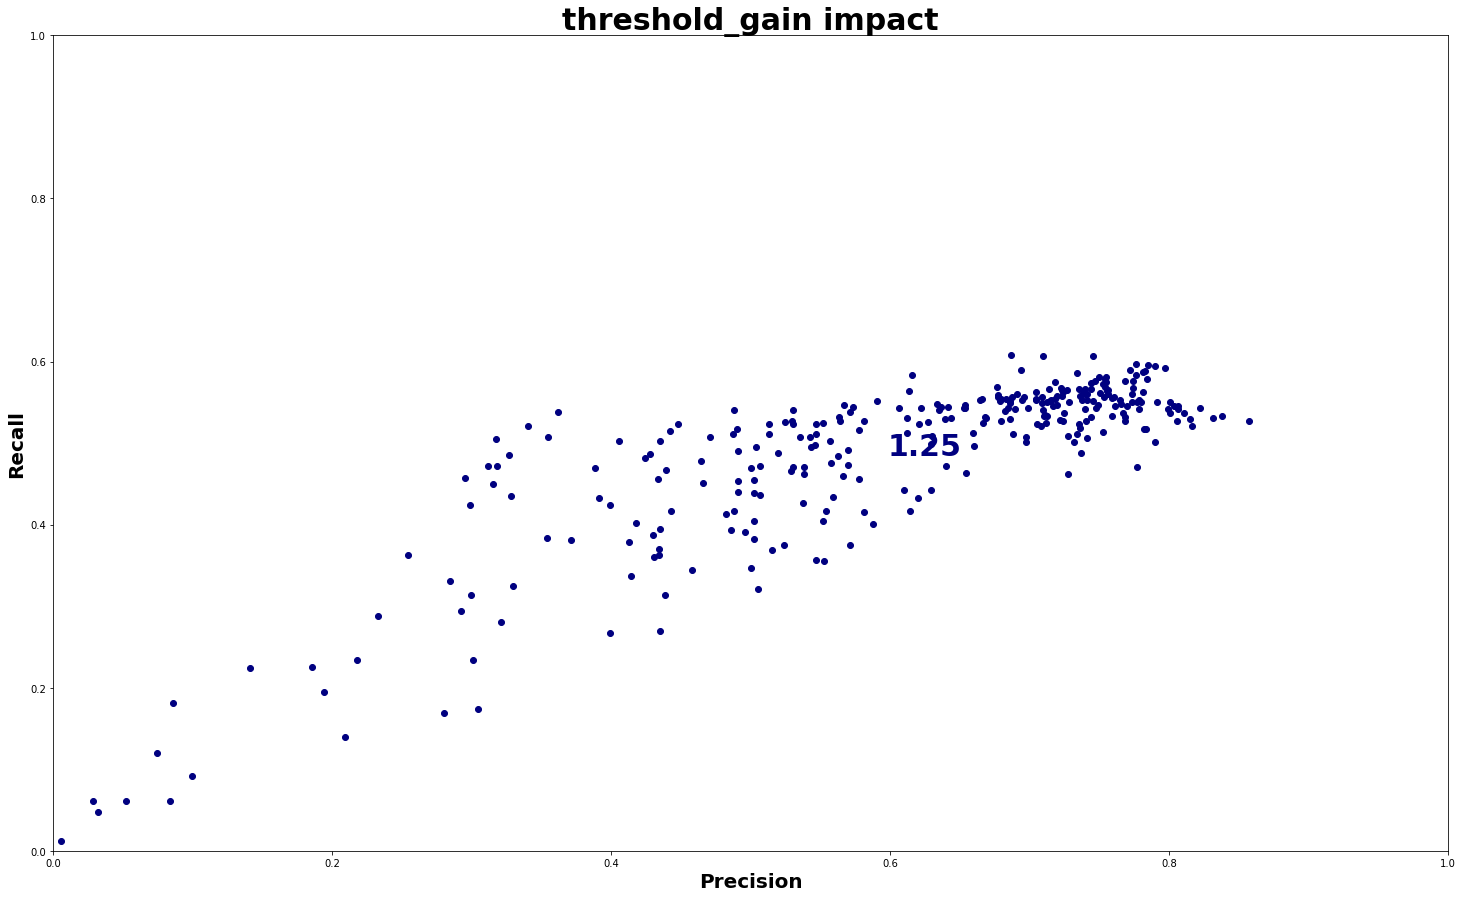

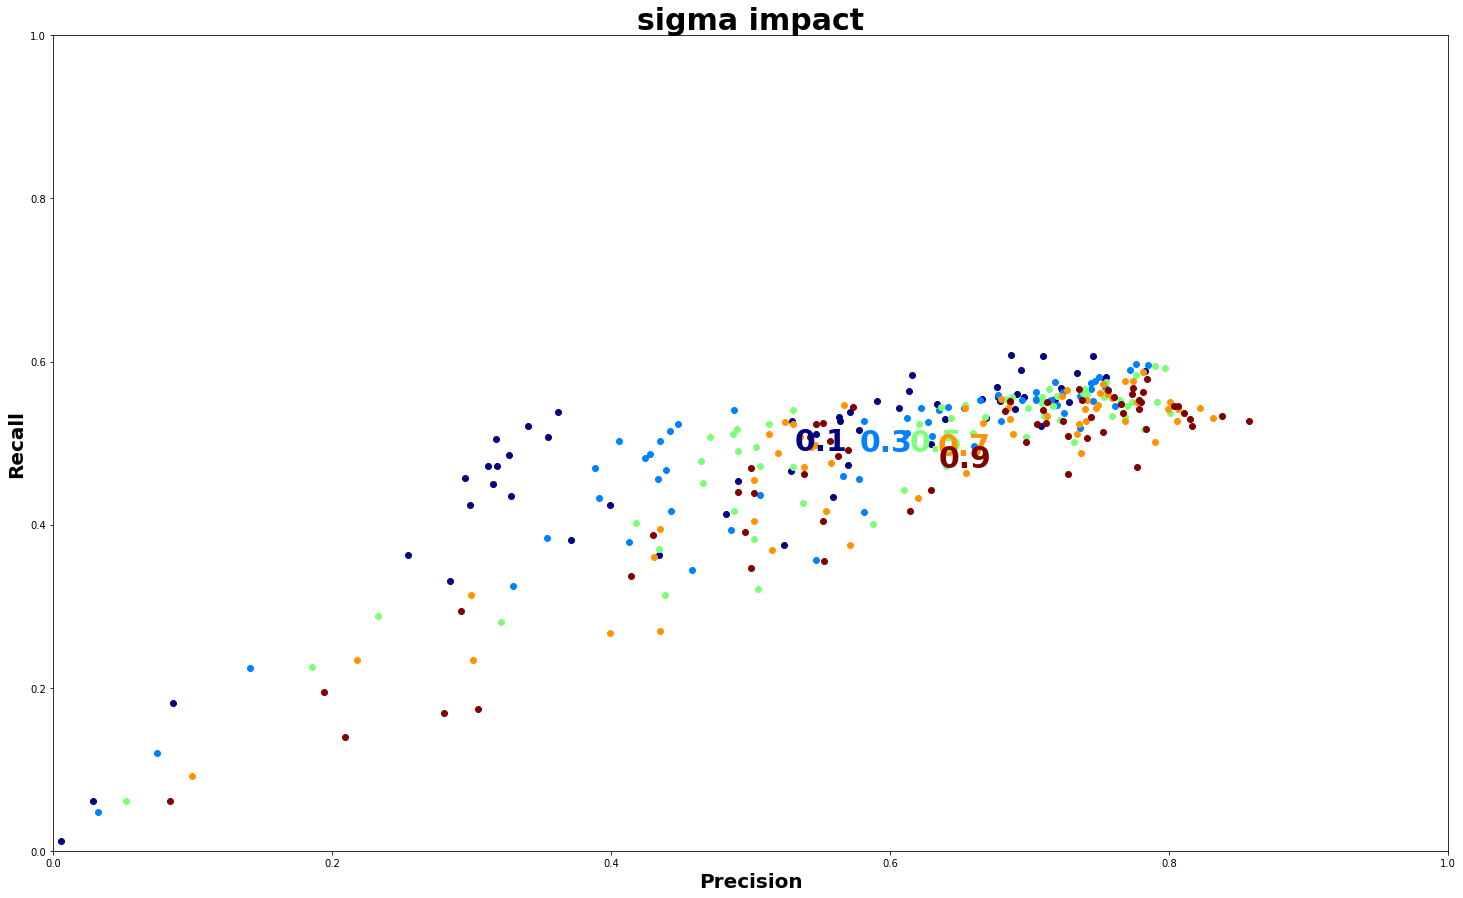

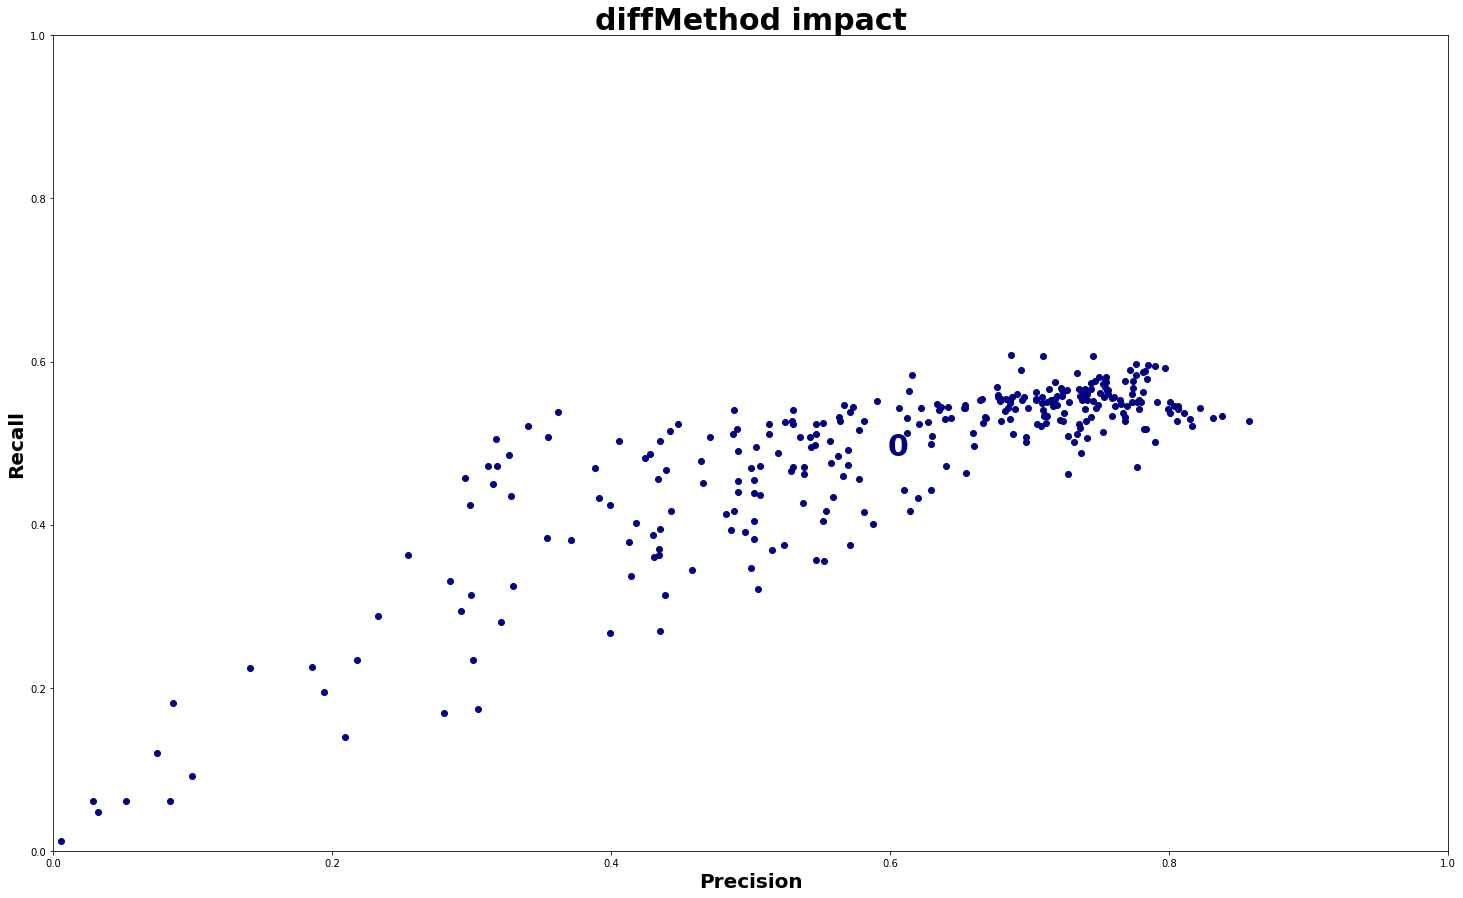

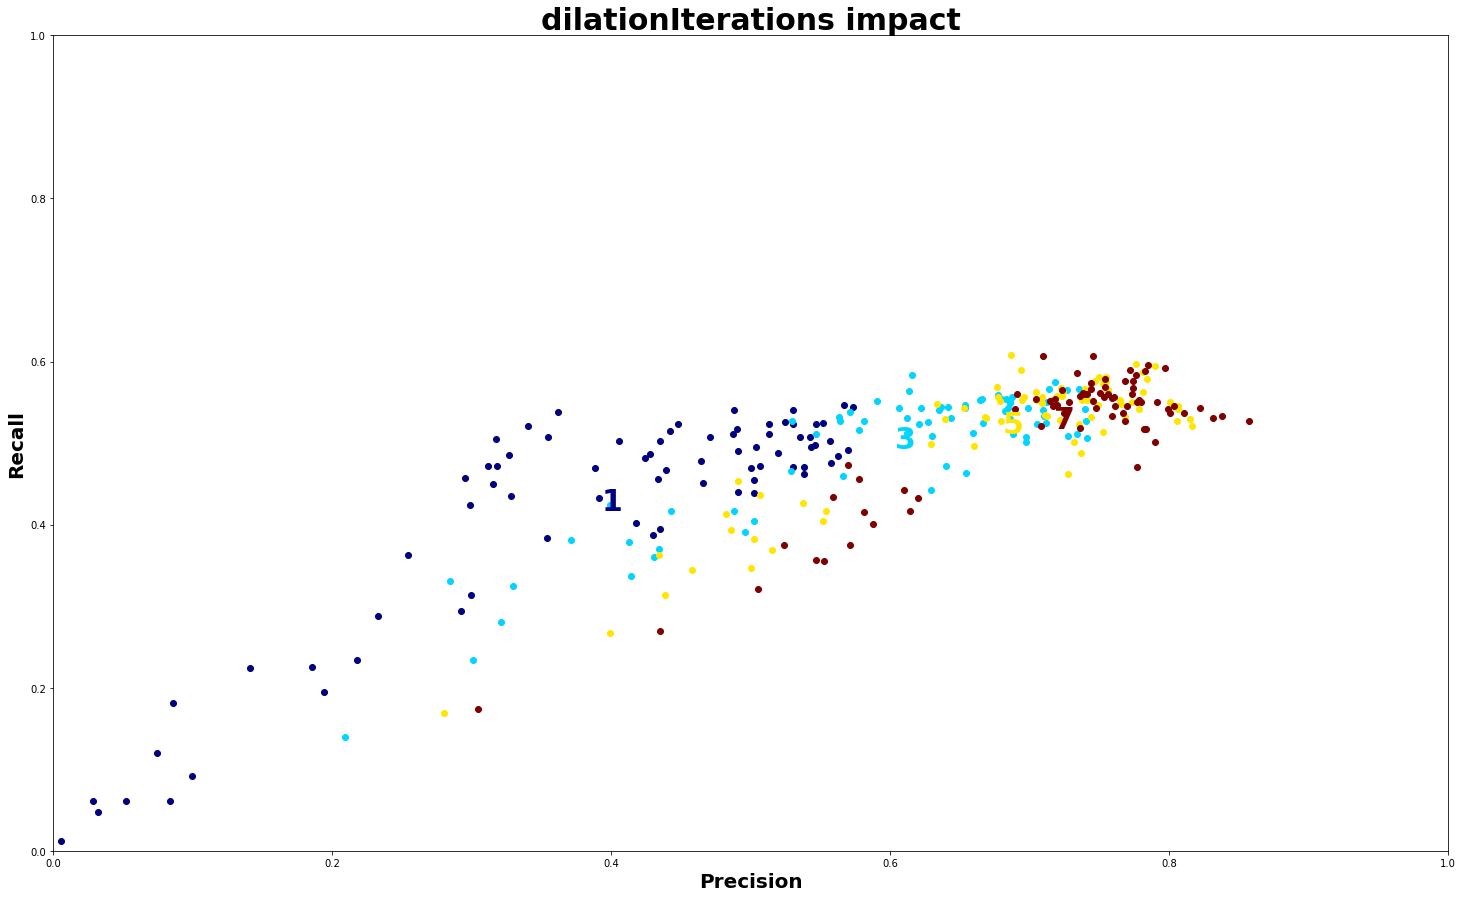

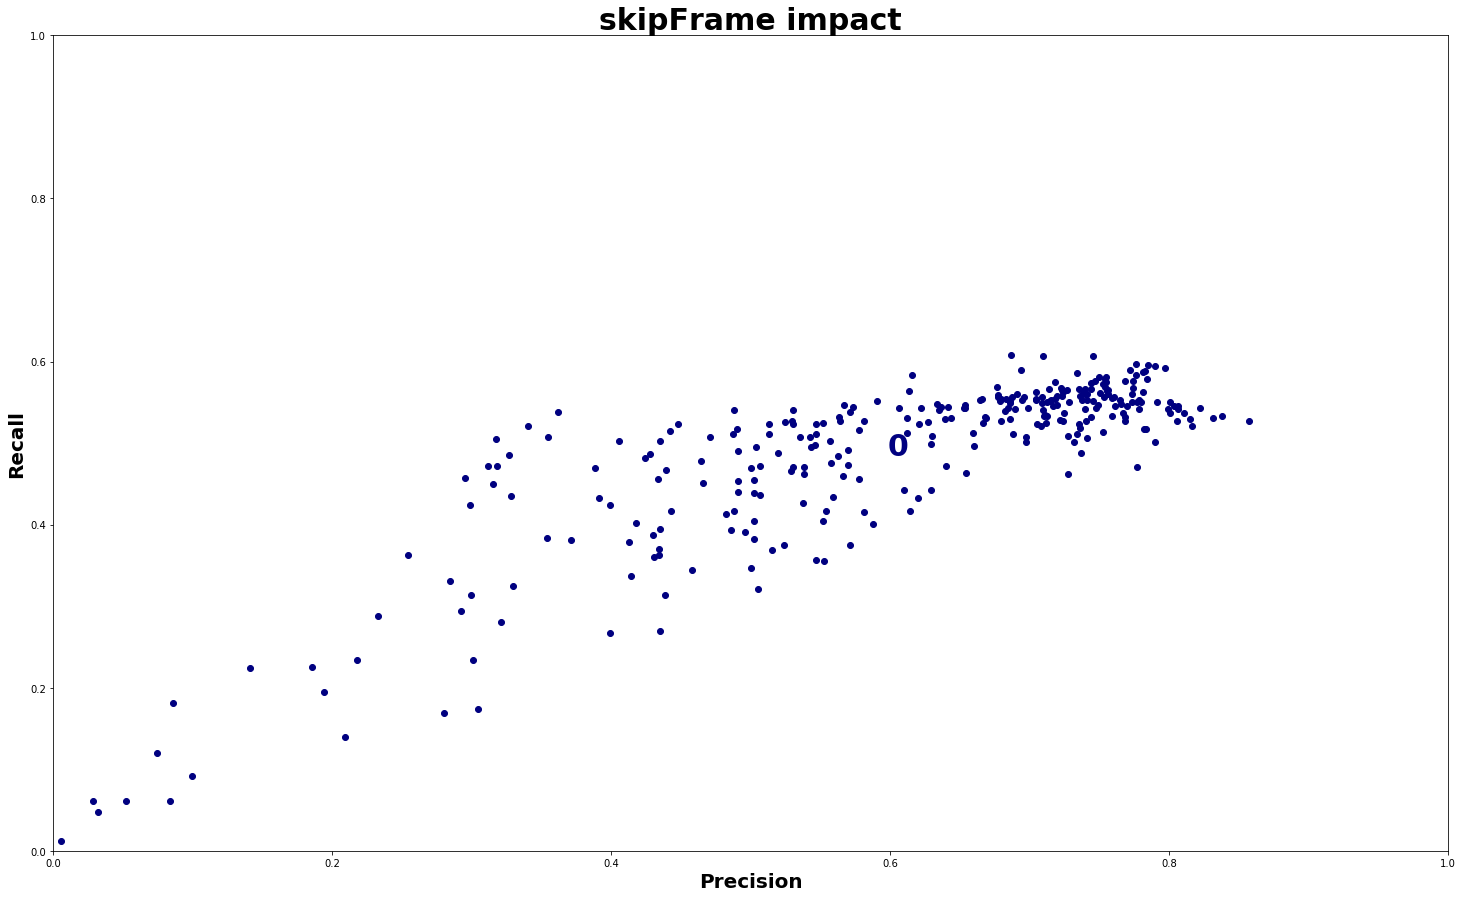

In [36]:
params = {
    'gaussWindow': range(3, 8, 2),
    'mgp': range(25, 26, 25),
    'residualConnections': range(1, 10, 2),
    'winSize': range(3, 4, 2),
    'maxLevel': range(5, 6, 3),
    'threshold_low': range(65, 66, 10),
    'threshold_gain': np.linspace(1.25, 1.26, 1),
    'sigma': np.linspace(0.1, 0.9, 5),
    'diffMethod': range(0, 1, 1),
    'dilationIterations': range(1, 8, 2),
    'skipFrame': range(0, 1, 1)
}

for items in params.items():
    plotParam(items[0], items[1])

In [37]:
# Max f1_score
df[df["f1_score"] == max(df["f1_score"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold_low,threshold_gain,sigma,diffMethod,dilationIterations,skipFrame,real_fps,avg_nb_boxes,avg_nb_filtered_boxes,avg_nb_heli_bbox,precision,recall,f1_score
247,3,25,9,3,5,65,1.25,0.5,0,7,0,177.411233,1.183099,1.174648,0.93662,0.797362,0.591637,0.679265


In [40]:
# Max precision
df[df["precision"] == max(df["precision"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold_low,threshold_gain,sigma,diffMethod,dilationIterations,skipFrame,real_fps,avg_nb_boxes,avg_nb_filtered_boxes,avg_nb_heli_bbox,precision,recall,f1_score
289,7,25,5,3,5,65,1.25,0.9,0,7,0,149.812765,0.970588,0.969188,0.830532,0.856936,0.52758,0.653084


In [41]:
# Max recall
df[df["recall"] == max(df["recall"])]

,gaussWindow,mgp,residualConnections,winSize,maxLevel,threshold_low,threshold_gain,sigma,diffMethod,dilationIterations,skipFrame,real_fps,avg_nb_boxes,avg_nb_filtered_boxes,avg_nb_heli_bbox,precision,recall,f1_score
170,3,25,9,3,5,65,1.25,0.1,0,5,0,185.623111,1.428169,1.401408,0.961972,0.686432,0.607651,0.644644


Text(0, 0.5, 'Score [-]')

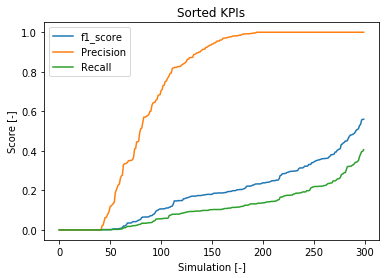

In [17]:
plt.figure()
plt.plot(sorted(df["f1_score"]))
plt.plot(sorted(df["precision"]))
plt.plot(sorted(df["recall"]))
plt.legend(['f1_score', 'Precision', 'Recall'])
plt.title("Sorted KPIs")
plt.xlabel("Simulation [-]")
plt.ylabel("Score [-]")